# Linear and Logistic Regression in TensorFlow

## Dataset
[Fire and Theft in Chicago](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr05.html)

## Reference

[CS 20SI: TensorFlow for Deep Learning Research](http://web.stanford.edu/class/cs20si/lectures/notes_03.pdf)

## Notice:
In the so called "stochastic" gradient descent applied in this notebook, the data is not shuffled in each iteration. So it is no stochastic gradient descent technically.


### Import corresponding libraries.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

### Read dataset.

In [2]:
FILE_NAME=r".\data\slr05.xls"
book=xlrd.open_workbook(filename=FILE_NAME,encoding_override="UTF-8")
sheet=book.sheet_by_index(0)
data=np.asarray([sheet.row_values(i) for i in range(1,sheet.nrows)])

### Create graph.

In [3]:
X=tf.placeholder(dtype=tf.float32,name="X")
Y=tf.placeholder(dtype=tf.float32,name="Y")
w=tf.Variable(0.0,name="w")
b=tf.Variable(0.0,name="b")
Y_pred=w*X+b
loss=tf.square(Y-Y_pred,name="loss")
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

### Train $w$, $b$ with stochastic gradient descent in a session.

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):#Number of iterations
        for x,y in data:
            sess.run(optimizer,feed_dict={X:x,Y:y})
    w_val,b_val=sess.run([w,b])
print("w:",w_val,"b:",b_val)

w: 2.03623 b: 2.48112


### Plot and evaluate fitting.

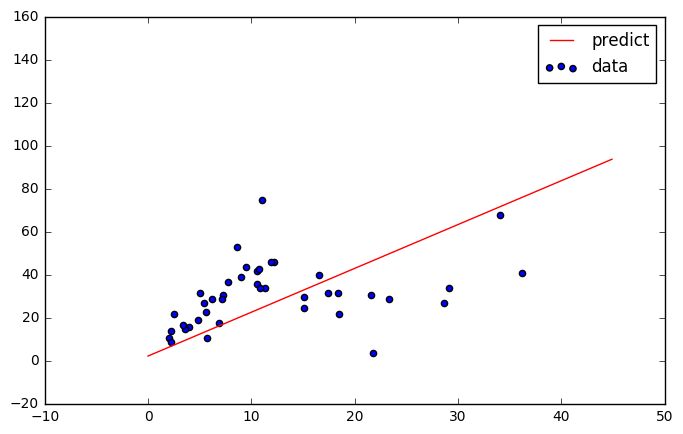

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=w_val*x_plot+b_val
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.legend()
plt.show()

### Train $w$, $b$ with batch gradient descent in another session.

In [6]:
#Need to use new learning rate for batch gradient descent.
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)#Use new optimizer (with smaller learning rate).
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):#Number of iterations
        sess.run(optimizer,feed_dict={X:data.T[0],Y:data.T[1]})
    w_val,b_val=sess.run([w,b])
print("w:",w_val,"b:",b_val)

w: 1.9417 b: 4.52292


### Plot and evaluate fitting.

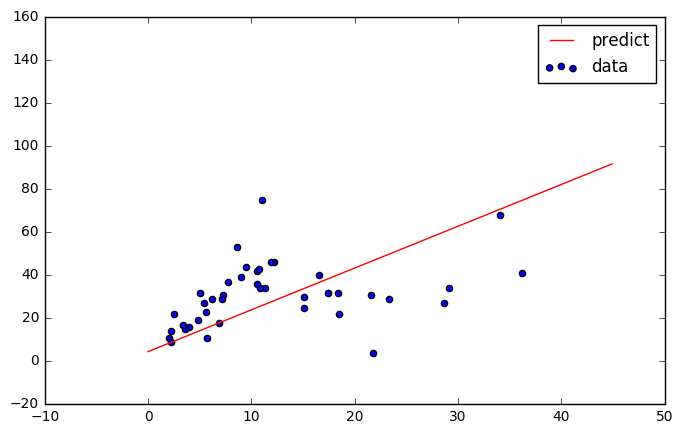

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=w_val*x_plot+b_val
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.legend()
plt.show()

### Create new graph for regression.

In [8]:
X=tf.placeholder(dtype=tf.float32,name="X")
Y=tf.placeholder(dtype=tf.float32,name="Y")
w3=tf.Variable(0.0,name="w3")
w2=tf.Variable(0.0,name="w2")
w1=tf.Variable(0.0,name="w1")
w0=tf.Variable(0.0,name="w0")
Y_pred=w3*X*X*X+w2*X*X+w1*X+w0
loss=tf.square(Y-Y_pred)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-12).minimize(loss)

### Train $w_{3}$, $w_{2}$, $w_{1}$, $w_{0}$ with stochastic gradient descent in a session.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):#Number of iterations
        for x,y in data:
            sess.run(optimizer,feed_dict={X:x,Y:y})
    param=sess.run([w3,w2,w1,w0])
for i in range(4):
    print("w{}: {}".format(3-i,param[i]))

w3: 0.001860584132373333
w2: 0.0001647870521992445
w1: 1.65038163686404e-05
w0: 1.8527719021221856e-06


### Plot and evaluate fitting.

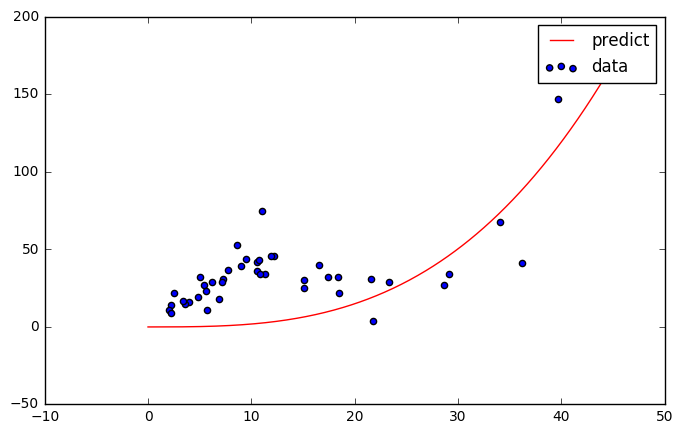

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=param[0]*(x_plot**3)+param[1]*x_plot**2+param[2]*x_plot+param[3]
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.legend()
plt.show()